In [26]:
import pandas as pd
import seaborn as sns

In [27]:
df = pd.read_json("gme.json")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


In [29]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


# Variables: 1) Date (Trading data), 2) Open (The price of the stock at the beginning of the trading day), 3) High (The highest price the stock reached during that trading day), 4) Low (The lowest price the stock fell to during that trading day), 5) Close (The price of the stock at the end of the trading day), 6) Adj Close (The closing price adjusted for dividends and stock splits, giving a more accurate reflection of the stock's value over time), 7) Volume (The total number of shares traded during that trading day)

In [30]:
df['High'].max()

120.75

In [31]:
df[df["High"] == 120.75]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [33]:
count = 0
total = 0
for i in range(len(df)):
    if df.loc[i]["Date"].month == 11:
        avg = (df.loc[i]["High"] + df.loc[i]["Low"]) / 2
        total += avg
        count += 1
total/count

9.442765287777776

<AxesSubplot:xlabel='Low', ylabel='Volume'>

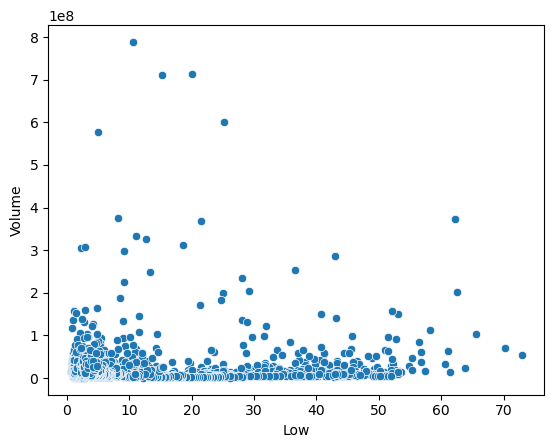

In [34]:
sns.scatterplot(data=df, x="Low", y="Volume")

# According to the graph, the data seems to follow a trend where the correlation between the two variables is the most prominent when the volume is at its lowest. The general relationship between the two is that the stocks are at their lowest when the stocks are low. Disregarding the outliers, the direction of the data seems to be in an overall positive form.

In [35]:
df["Low"].corr(df["Volume"])

0.10259646883179026

<AxesSubplot:xlabel='High', ylabel='Date'>

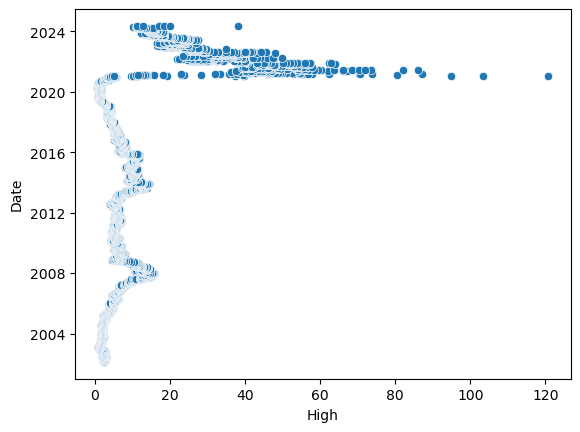

In [36]:
sns.scatterplot(data=df, x="High", y="Date")

In [43]:
import numpy as np

In [45]:
df["High"].corr(df["Date"].astype(np.int64))

0.4889959232324393

# The correlation between the variables is that when the date increased (or as the company aged), the amount of High stocks increased tremendously, with the biggest around 2021. The form is pretty messy, but it skews toward the year of 2004. The relationship between the two is that while the Date increases, the High increases as well. The direction is generally positive, with a mid to low strength.